# Data Preprocessing

This notebook focuses on importing the data and turning it into MFCCs for the model to learn from. This approach is discussed more in blog week 5.

Librosa is a python package for manipulating data. It includes several useful functions, including being able to manipulate audio data into MFCCs or Spectrograms. Numpy is used to create large arrays to load the data into.

In [14]:
import librosa
import numpy as np
from scipy.io import wavfile as wav


The code below will read in a file, and convert it to an MFCC using Librosa.

In [16]:
file_name = "../Datasets/test/train_balanced/Emergency/43.wav"
audio, sample_rate = librosa.load(file_name)
scipy_sample_rate, scipy_audio = wav.read(file_name)
print("Sample rate pre Librosa: " + str(scipy_sample_rate))
print("Sample rate: " + str(sample_rate))

Sample rate pre Librosa: 48000
Sample rate: 22050


In [11]:
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 430)


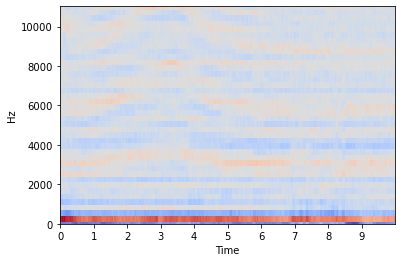

In [12]:
import librosa.display

librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='linear')

In [5]:
import IPython.display
from IPython.display import Audio
Audio(file_name)

## Get MFCC for every file

Create a function which will extract the features for a file given. Then create a loop that will go through every file, label it as emergency or non-emergency and add it to a list. Then turn this list into a Pandas DataFrame for the model to use.

// The below creates a csv file with the list of files and their classes for the feature extraction to work off. This removes the .DS store issue

In [6]:
emergency_train_dataset_path = '../Datasets/Data/Emergency/'
non_emergency_train_dataset_path = '../Datasets/Data/nonEmergency/'


import csv
import os

with open("metadata.csv", 'w')as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["filename","class_name"])
    for file_name in os.listdir(emergency_train_dataset_path):
        if file_name != '.DS_Store':
            csvwriter.writerow([file_name, "emergency"])
    for file_name in os.listdir(non_emergency_train_dataset_path):
        if file_name != '.DS_Store':
            csvwriter.writerow([file_name, "non_emergency"])

In [7]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        return mfccsscaled
        
    except Exception as e:
        print("Error encountered while parsing file: " + file_name)
        return None

In [8]:
import pandas as pd

Pandas dataframes are 2 dimensional data structures. Think of like a  database table with rows and columns. Its used here as it can be converted to a numpy array later which is what is fed into the neural network

In [9]:
features = []
for index,row in pd.read_csv("metadata.csv").iterrows():
    class_label = row["class_name"]
    if(class_label=="emergency"):
        data = extract_features(emergency_train_dataset_path + row["filename"])
        features.append([data, class_label])
    else:
        data = extract_features(non_emergency_train_dataset_path + row["filename"])
        features.append([data, class_label])


featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  2057  files


## Convert the data

Convert the data into a numpy array as well as the labels so the ML model can understand it. Store the data for use of training the model in another notebook.

In [10]:
# This was used to identify the problem with the .DS_Store file

for f in featuresdf.feature:
    try:
        print(f.size)
    except:
        print(f)

LabelEncoder translates the labesl to 0 to the number of classes -1. so emergency is 0 and nonEmergency is 1.

In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

Using TensorFlow backend.


Test size is the number which defines the percentage size of the training set and test set. Here 80% is training and 20% is test. Random_state is the object that controls randomization in spliting. Setting this variable insures that the splits in data are reproducible.

In [12]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [13]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)
